In [1]:
import pandas as pd
import matplotlib.pyplot as plt
## importing is done
df = pd.read_csv("Spotify_Most_Streamed_Songs.csv") ## loading data 
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [2]:
df.shape
df.info()
##data overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [3]:
df = df.drop_duplicates()
#convert stream to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])
df.isnull().sum()
##data cleaning here

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [4]:
df['streams'].describe() 

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

In [5]:
top_ten = df[['track_name','artist(s)_name','streams']].sort_values( by='streams', ascending=False).head(10)
top_ten
## exploratory data analysis ( eda)

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
162,One Dance,"Drake, WizKid, Kyla",2.713922e+09
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
140,Believer,Imagine Dragons,2.594040e+09
725,Closer,"The Chainsmokers, Halsey",2.591224e+09
48,Starboy,"The Weeknd, Daft Punk",2.565530e+09


In [6]:
import seaborn as sns
sns.set_style("whitegrid") ## importing seaborn

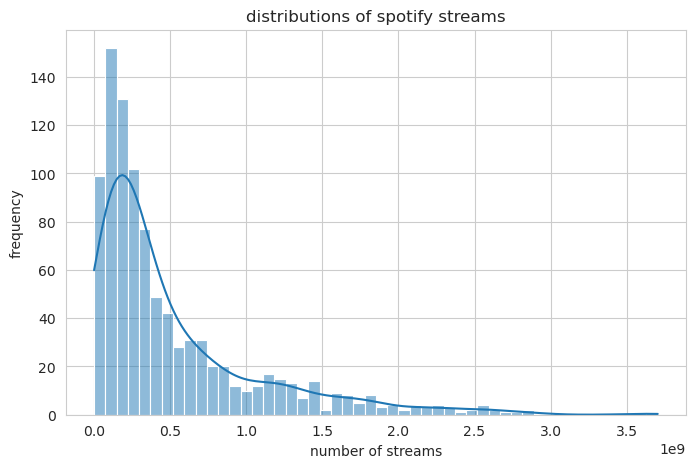

In [7]:
## analyize stream of distribution
plt.figure(figsize=(8,5)) ## setting a figure size
sns.histplot(df['streams'],bins=50,kde=True)
plt.title("distributions of spotify streams")
plt.xlabel("number of streams") ## labeling x
plt.ylabel("frequency") ## labeling y
plt.show()

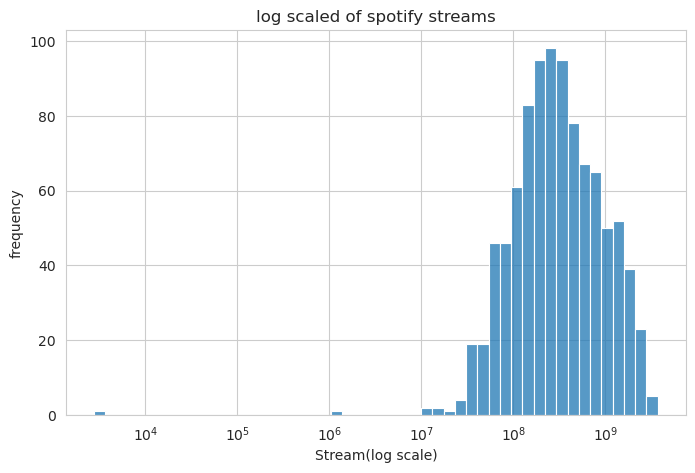

In [8]:
plt.figure(figsize=(8,5)) 
sns.histplot(df['streams'],bins=50,log_scale=True)
plt.title("log scaled of spotify streams")
plt.xlabel("Stream(log scale)") 
plt.ylabel("frequency") 
plt.show()

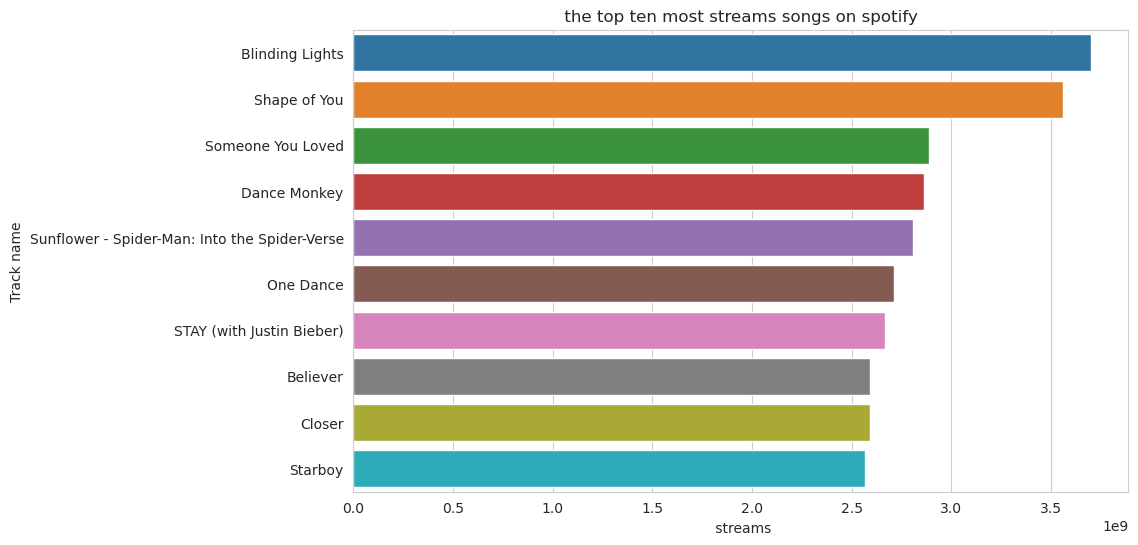

In [9]:
plt.figure(figsize=(10,6))
sns.barplot( data = top_ten,
              y='track_name',
              x='streams'
            )
plt.title(" the top ten most streams songs on spotify ")
plt.xlabel(" streams") 
plt.ylabel("Track name") 
plt.show()

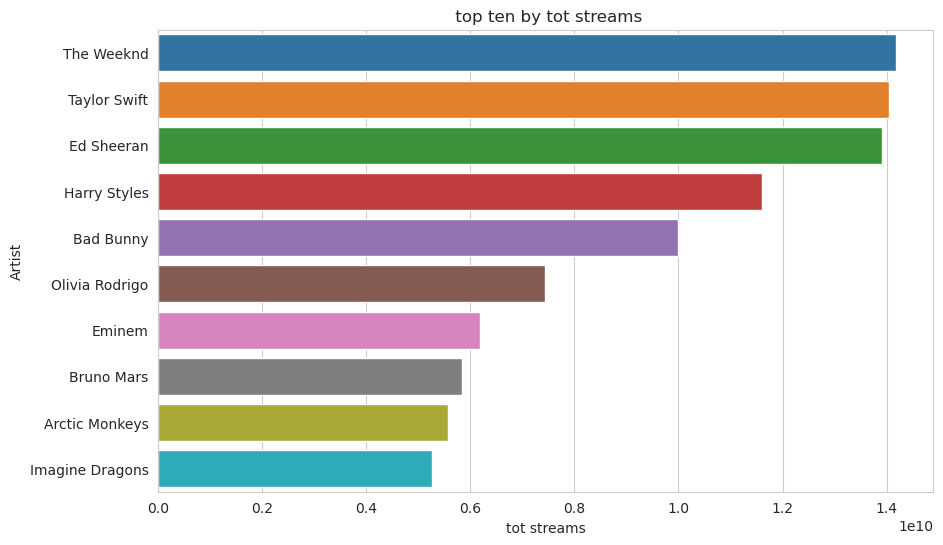

In [10]:
top_artists =(
    df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)
)
plt.figure(figsize=(10,6))
sns.barplot( 
    x=top_artists.values,
    y=top_artists.index 
)
plt.title(" top ten by tot streams")
plt.xlabel("tot streams") 
plt.ylabel("Artist") 
plt.show()

In [11]:
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [12]:
platform_features=['in_spotify_playlists',
                   'in_apple_playlists',
                   'in_deezer_playlists'
                  ]
df[platform_features].describe()

,in_spotify_playlists,in_apple_playlists
count,952.000000,952.000000
mean,5202.565126,67.866597
std,7901.400683,86.470591
min,31.000000,0.000000
25%,874.500000,13.000000
50%,2216.500000,34.000000
75%,5573.750000,88.000000
max,52898.000000,672.000000


In [13]:
df['popularity_tier'] = pd.qcut( df['streams'],
                                 q=4,
                                 labels= ['low', ' medium', 'high', 'very high' ]
)

In [14]:
df['popularity_tier'].value_counts()

popularity_tier
low          238
 medium      238
high         238
very high    238
Name: count, dtype: int64

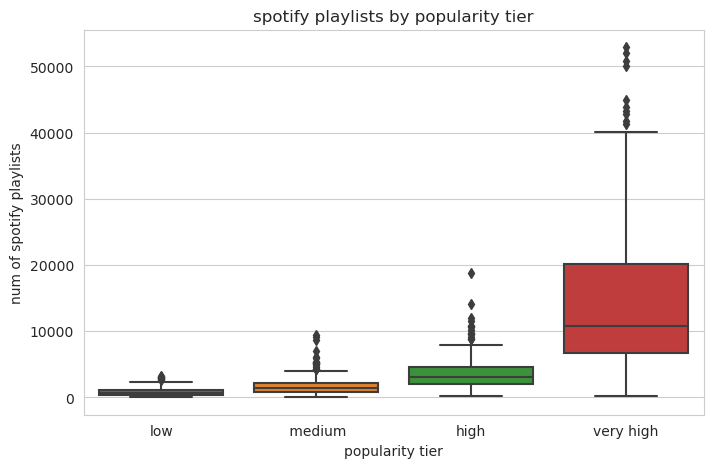

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot( 
    x='popularity_tier',
    y='in_spotify_playlists',
    data=df
)
plt.title("spotify playlists by popularity tier")
plt.xlabel("popularity tier")
plt.ylabel("num of spotify playlists")
plt.show()

In [16]:
artist_stats = (
    df.groupby('artist(s)_name')
    .agg(
        tot_streams=('streams', 'sum'),
        avg_streams=('streams','mean'),
        song_count=('track_name', 'count')
    )
    .sort_values('tot_streams', ascending=False)
    .head(10)
)
artist_stats

,tot_streams,avg_streams,song_count
artist(s)_name,,,
The Weeknd,1.418555e+10,6.447979e+08,22
Taylor Swift,1.405366e+10,4.133429e+08,34
Ed Sheeran,1.390895e+10,1.545439e+09,9
Harry Styles,1.160865e+10,6.828615e+08,17
Bad Bunny,9.997800e+09,5.262000e+08,19
Olivia Rodrigo,7.442149e+09,1.063164e+09,7
Eminem,6.183806e+09,1.545951e+09,4
Bruno Mars,5.846921e+09,1.461730e+09,4
Arctic Monkeys,5.569807e+09,1.392452e+09,4


In [17]:
df[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].dtypes


in_spotify_playlists     int64
in_apple_playlists       int64
in_deezer_playlists     object
dtype: object

In [18]:
df['in_deezer_playlists'] =(
    df['in_deezer_playlists']
             .astype(str)
             .str.replace(',','',regex=True)
             .astype(int)
            )

In [19]:
df[['in_spotify_playlists','in_apple_playlists','in_deezer_playlists']].dtypes

in_spotify_playlists    int64
in_apple_playlists      int64
in_deezer_playlists     int64
dtype: object

In [20]:
df['platform_score']=(
    df['in_spotify_playlists'] +
    df['in_apple_playlists']+
    df['in_deezer_playlists']
)

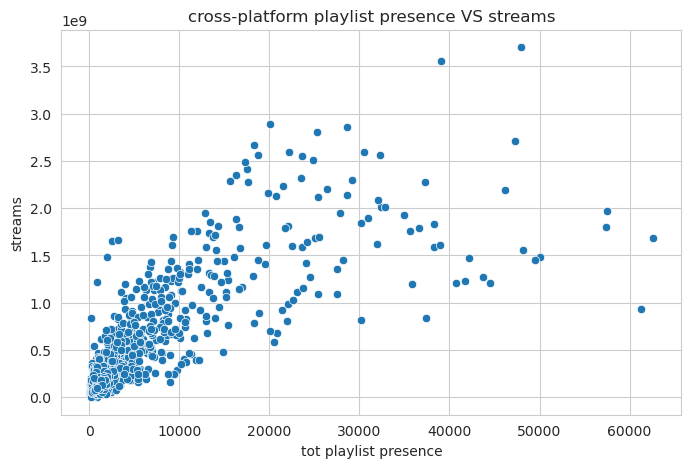

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='platform_score',
    y='streams',
    data=df )
plt.title("cross-platform playlist presence VS streams")
plt.xlabel("tot playlist presence")
plt.ylabel("streams")
plt.show()